In [46]:
import pandas as pd
import numpy as np
import gurobipy as gp
from gurobipy import GRB
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [47]:
# Read the drive time matrix from CSV
drive_time_matrix = pd.read_csv('data/matrix_duration_matrix_DRIVE.csv', index_col=0)
# Convert drive time values from seconds to minutes
drive_time_matrix = drive_time_matrix.astype('float64') / 60

drive_time_matrix.columns = drive_time_matrix.columns.astype(int)
drive_time_matrix.index = drive_time_matrix.index.astype(int)

caregivers = pd.read_csv('data/caregivers.csv', index_col=0)

tasks = pd.read_csv('data/hemtjanst_tasks.csv', index_col=0)
tasks = tasks[(tasks['TaskType'] == 'Hemtjänst')]
tasks['ClientID'] = tasks['ClientID'].astype(int)

clients = pd.read_csv('data/clients.csv', index_col=0)
caregivers['Attributes'] = caregivers['Attributes'].apply(lambda x: np.array(eval(x)))
clients['Requirements'] = clients['Requirements'].apply(lambda x: np.array(eval(x)))
# Alternatively, we could keep track of which entries were NA
# tasks['is_client_id_na'] = tasks['ClientID'].isna()
display(tasks)
display(caregivers)
display(clients)

,ClientID,StartTime,EndTime,TaskType,PlannedCaregiverID
ID,,,,,
4693295,1661,2025-03-05T07:30:00+01:00,2025-03-05T07:50:00+01:00,Hemtjänst,1146
4721787,679,2025-03-05T07:30:00+01:00,2025-03-05T08:00:00+01:00,Hemtjänst,33
4730882,1569,2025-03-05T07:30:00+01:00,2025-03-05T08:15:00+01:00,Hemtjänst,1180
4882374,1612,2025-03-05T07:30:00+01:00,2025-03-05T07:40:00+01:00,Hemtjänst,1163
4725053,1474,2025-03-05T07:30:00+01:00,2025-03-05T08:00:00+01:00,Hemtjänst,1284
...,...,...,...,...,...
4884848,1704,2025-03-05T22:10:00+01:00,2025-03-05T22:30:00+01:00,Hemtjänst,1364
4730192,1349,2025-03-05T22:10:00+01:00,2025-03-05T22:20:00+01:00,Hemtjänst,1264
4730557,978,2025-03-05T22:10:00+01:00,2025-03-05T22:25:00+01:00,Hemtjänst,979


,ModeOfTransport,Attributes,EarliestStartTime,LatestEndTime,StartLocation,EndLocation,RequiresBreak
ID,,,,,,,
1264,pedestrian,"[1, 0]",2025-03-05T16:00:00+01:00,2025-03-05T22:30:00+01:00,Home,Home,True
979,car,"[1, 1]",2025-03-05T16:00:00+01:00,2025-03-05T22:30:00+01:00,HQ,HQ,True
36,car,"[0, 0]",2025-03-05T10:00:00+01:00,2025-03-05T17:00:00+01:00,HQ,HQ,True
33,car,"[0, 0]",2025-03-05T07:30:00+01:00,2025-03-05T16:00:00+01:00,HQ,HQ,True
1335,pedestrian,"[1, 0]",2025-03-05T07:30:00+01:00,2025-03-05T16:15:00+01:00,Home,Home,True
949,car,"[1, 0]",2025-03-05T07:30:00+01:00,2025-03-05T16:00:00+01:00,HQ,HQ,True
1376,bicycle,"[0, 0]",2025-03-05T16:00:00+01:00,2025-03-05T22:30:00+01:00,Home,Home,True
1183,pedestrian,"[0, 0]",2025-03-05T07:30:00+01:00,2025-03-05T16:00:00+01:00,Home,Home,True
1167,pedestrian,"[0, 0]",2025-03-05T16:00:00+01:00,2025-03-05T22:30:00+01:00,Home,Home,True


,Requirements
ID,
156,"[0, 0]"
174,"[0, 0]"
269,"[0, 0]"
272,"[0, 0]"
273,"[0, 0]"
...,...
1704,"[0, 0]"
1709,"[0, 0]"
1712,"[0, 0]"


In [48]:
# Convert time strings to datetime objects and extract minutes since midnight
tasks['start_minutes'] = pd.to_datetime(tasks['StartTime']).dt.hour * 60 + pd.to_datetime(tasks['StartTime']).dt.minute
tasks['end_minutes'] = pd.to_datetime(tasks['EndTime']).dt.hour * 60 + pd.to_datetime(tasks['EndTime']).dt.minute
tasks['duration_minutes'] = tasks['end_minutes'] - tasks['start_minutes']
caregivers['start_minutes'] = pd.to_datetime(caregivers['EarliestStartTime']).dt.hour * 60 + pd.to_datetime(caregivers['EarliestStartTime']).dt.minute
caregivers['end_minutes'] = pd.to_datetime(caregivers['LatestEndTime']).dt.hour * 60 + pd.to_datetime(caregivers['LatestEndTime']).dt.minute

In [64]:
def build_home_care_model_dfbased(
    caregivers: pd.DataFrame,           # ID,ModeOfTransport,Attributes,start_minutes,end_minutes,StartLocation,EndLocation,RequiresBreak
    tasks: pd.DataFrame,                # ID,ClientID,start_minutes,end_minutes,duration_minutes,TaskType,PlannedCaregiverID
    clients: pd.DataFrame,              # ID,Requirements
    drive_time_matrix: pd.DataFrame,    # Drive time matrix from client col to client row. Uses client ID as indexes. Index 0 is the HQ.
    M
):
    K = caregivers.index.tolist()
    V = tasks.index.tolist()
    model = gp.Model('HomeCare')
    
    # For each caregiver, gather only the patients that caregiver k can serve,
    # then define the augmented node set (start, qualified patients, end).
    caregiver_tasks = {}
    for k in K:
        caregiver_attributes = caregivers.loc[k, 'Attributes']
        qualified_patients = clients[clients['Requirements'].apply(lambda req: np.dot(req, caregiver_attributes) == 0)].index.tolist()
        # Filter tasks to only include the ones with these qualified patients
        caregiver_tasks[k] = tasks[tasks['ClientID'].isin(qualified_patients)].index.tolist()
        
    # ---- 2. Decision Variables

    # x[k, i, j] = 1 if caregiver k goes directly from i to j, else 0.
    # Skip arcs into sigma[k] or out of tau[k], and skip i->i.
    x = {}
    for k in K:
        for i in V:
            # Add route to the start and end nodes
            x[k, "start", i] = model.addVar(vtype=GRB.BINARY, name=f'x^{k}_start_{i}')
            x[k, i, "end"] = model.addVar(vtype=GRB.BINARY, name=f'x^{k}_{i}_end')
            for j in V:
                if i != j:
                    x[k, i, j] = model.addVar(vtype=GRB.BINARY, name=f'x^{k}_{i}_{j}')
    
    # t[k,i] = arrival time of caregiver k at node i
    t = {}
    for k in K:
        t[k, "start"] = model.addVar(vtype=GRB.CONTINUOUS, name=f't^{k}_start')
        t[k, "end"] = model.addVar(vtype=GRB.CONTINUOUS, name=f't^{k}_end')
        for i in V:
            t[k, i] = model.addVar(vtype=GRB.CONTINUOUS, name=f't^{k}_{i}')
            
    model.update()
    
    # ---- 3. Objective Function
    # Minimize time bewteen start and end nodes for all caregivers
    model.setObjective(gp.quicksum(t[k, "end"] - t[k, "start"] for k in K), GRB.MINIMIZE)
    
    # ---- 4. Constraints
    # (V2) Each task is visited exactly once by exactly one caregiver
    for i in V:
        model.addConstr(gp.quicksum(x[k, j, i] for k in K for j in V + ["start"] if j != i) == 1, name=f'UniqueVisit[{i}]')
    
    # (V3) Flow conservation for each caregiver k
    for k in K:
        for i in V:
            model.addConstr(
                gp.quicksum(x[k, i, j] for j in V + ["end"] if i != j) - 
                gp.quicksum(x[k, j, i] for j in V + ["start"] if i != j) == 0, 
                name=f'Flow[{k},{i}]')
    
    # (V4) Route completion (start and end usage) for each caregiver
    # Only need to fix this for the start node, since flow conservation
    # and one visit per task ensures that the end node is also correctly handled
    for k in K:
        model.addConstr(gp.quicksum(x[k, "start", i] for i in V) <= 1, name=f'StartBalance[{k}]')
    
    # (V6) Only visit patients that the caregiver is qualified to visit
    model.addConstr(
        gp.quicksum(x[k, i, j] for k in K for j in V for i in V + ["start"] 
                    if j not in caregiver_tasks[k] and i != j) == 0,
        name='Qualification'
    )
    
    # (V7-V8) Arriving on time
    for k in K:
        for i in V:
            start_minutes = tasks.loc[i, 'start_minutes']
            end_minutes = tasks.loc[i, 'end_minutes']
            duration_minutes = tasks.loc[i, 'duration_minutes']
            model.addConstr(t[k, i] >= start_minutes, name=f'Earliest[{k},{i}]')
            model.addConstr(t[k, i] <= end_minutes - duration_minutes, name=f'Latest[{k},{i}]')
    
    # (V9) Temporal feasibility
    for k in K:
        model.addConstr(t[k, "end"] >= t[k, "start"], name=f'TemporalFeasibility[{k}]')
        for i in V + ["start"]:
            for j in V + ["end"]:
                if i != j and not (i == "start" and j == "end"):
                    # Calculate travel time based on locations
                    if i == "start":
                        # From start location to task
                        travel_time = 0 if caregivers.loc[k, 'StartLocation'] == "Home" else \
                                    drive_time_matrix.loc[0, tasks.loc[j, 'ClientID']]
                        service_time = 0
                    elif j == "end":
                        # From task to end location
                        travel_time = 0 if caregivers.loc[k, 'EndLocation'] == "Home" else \
                                    drive_time_matrix.loc[tasks.loc[i, 'ClientID'], 0]
                        service_time = tasks.loc[i, 'duration_minutes']
                    else:
                        # From task to task
                        travel_time = drive_time_matrix.loc[tasks.loc[i, 'ClientID'], tasks.loc[j, 'ClientID']]
                        service_time = tasks.loc[i, 'duration_minutes']
                    
                    # Add the constraint
                    model.addConstr(
                        t[k, j] >= t[k, i] + travel_time + service_time - M * (1 - x[k, i, j]),
                        name=f'TimeLink[{k},{i}->{j}]'
                    )
    return model, x, t

In [50]:
def calculate_big_M(caregivers, tasks, drive_time_matrix):
    """Calculate the smallest sufficient big M value for the model."""
    
    # 1. Get the planning horizon (time window)
    earliest_start = min(caregivers['start_minutes'].min(), tasks['start_minutes'].min())
    latest_end = max(caregivers['end_minutes'].max(), tasks['end_minutes'].max())
    time_horizon = latest_end - earliest_start
    
    # 2. Get maximum travel time between any locations
    max_travel_time = drive_time_matrix.max().max()
    
    # 3. Get maximum service duration
    max_service_time = tasks['duration_minutes'].max()
    
    # 4. Calculate big M with a small buffer (10%)
    big_M = (time_horizon + max_travel_time + max_service_time) * 1.1
    
    print(f"Calculated big M: {big_M}")
    print(f"- Time horizon: {time_horizon}")
    print(f"- Max travel time: {max_travel_time}")
    print(f"- Max service time: {max_service_time}")
    
    return big_M

In [66]:
# Subset with only caregivers 33, 949, 1108 and their tasks
subset = [33, 949, 1108]
caregivers_subset = caregivers.loc[subset]
tasks_subset = tasks[tasks['PlannedCaregiverID'].isin(subset)]
client_subset = clients.loc[tasks_subset['ClientID']]
drive_time_matrix_subset = drive_time_matrix.loc[client_subset.index, client_subset.index]
big_M_subset = calculate_big_M(caregivers_subset, tasks_subset, drive_time_matrix_subset)

print(f"Number of caregivers in subset: {len(caregivers_subset)}")
print(f"Number of tasks assigned to subset caregivers: {len(tasks_subset)}")

Calculated big M: 683.6500000000001
- Time horizon: 510
- Max travel time: 21.5
- Max service time: 90
Number of caregivers in subset: 3
Number of tasks assigned to subset caregivers: 27


In [67]:
model_subset, x_subset, t_subset = build_home_care_model_dfbased(caregivers_subset, tasks_subset, clients, drive_time_matrix, big_M_subset)

In [68]:
model_subset.optimize()

Gurobi Optimizer version 12.0.1 build v12.0.1rc0 (mac64[arm] - Darwin 24.3.0 24D70)

CPU model: Apple M2 Pro
Thread count: 10 physical cores, 10 logical processors, using up to 10 threads

Optimize a model with 2545 rows, 2355 columns and 13722 nonzeros
Model fingerprint: 0x79bd8444
Variable types: 87 continuous, 2268 integer (2268 binary)
Coefficient statistics:
  Matrix range     [1e+00, 7e+02]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 9e+02]
Presolve removed 2386 rows and 1673 columns
Presolve time: 0.05s
Presolved: 159 rows, 682 columns, 1958 nonzeros
Variable types: 6 continuous, 676 integer (676 binary)
Found heuristic solution: objective 1554.3833333

Root relaxation: objective 4.314117e+01, 385 iterations, 0.01 seconds (0.01 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   43.14117    0   27 1554.3

In [69]:
# Subset with only car caregivers
car_caregivers = caregivers[caregivers['ModeOfTransport'] == 'car']
car_caregiver_ids = car_caregivers.index.tolist()
car_tasks = tasks[tasks['PlannedCaregiverID'].isin(car_caregiver_ids)]
car_clients = clients.loc[car_tasks['ClientID']]
drive_time_matrix_car = drive_time_matrix.loc[car_clients.index, car_clients.index]
big_M_car = calculate_big_M(car_caregivers, car_tasks, drive_time_matrix_car)

print(f"Number of car caregivers: {len(car_caregivers)}")
print(f"Number of tasks assigned to car caregivers: {len(car_tasks)}")

Calculated big M: 1165.1200000000001
- Time horizon: 905
- Max travel time: 34.2
- Max service time: 120
Number of car caregivers: 17
Number of tasks assigned to car caregivers: 155


In [70]:
model_car, x_car, t_car = build_home_care_model_dfbased(car_caregivers, car_tasks, clients, drive_time_matrix, big_M_car)

In [71]:
model_car.optimize()

Gurobi Optimizer version 12.0.1 build v12.0.1rc0 (mac64[arm] - Darwin 24.3.0 24D70)

CPU model: Apple M2 Pro
Thread count: 10 physical cores, 10 logical processors, using up to 10 threads

Optimize a model with 419155 rows, 413729 columns and 2485924 nonzeros
Model fingerprint: 0xe5fc6eda
Variable types: 2669 continuous, 411060 integer (411060 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+03]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+03]
Presolve removed 411439 rows and 240728 columns
Presolve time: 0.18s
Presolved: 7716 rows, 173001 columns, 523953 nonzeros
Variable types: 34 continuous, 172967 integer (172967 binary)
Performing another presolve...
Presolve removed 2492 rows and 0 columns
Presolve time: 0.60s
Deterministic concurrent LP optimizer: primal simplex, dual simplex, and barrier
Showing barrier log only...

Root barrier log...

Ordering time: 0.01s

Barrier statistics:
 Dense cols : 4
 AA' NZ     : 7.814

In [29]:
def extract_model_metrics(model, x, t, K, V, s, sigma, tau):
    """
    Extract key metrics from an optimized model.
    
    Parameters:
    -----------
    model : Gurobi model
        The optimized model
    K : list
        List of caregivers
    V : list
        List of patients/clients
    s : dict
        Service times for each node
    t : dict
        Time variables from the model
    x : dict
        Flow variables from the model
    sigma : dict
        Start depot for each caregiver
    tau : dict
        End depot for each caregiver
        
    Returns:
    --------
    tuple
        - Dictionary containing metrics for each caregiver:
          - total_time: end time - start time
          - productive_time: sum of service times for visited patients
          - utilization_rate: productive_time / total_time
        - Dictionary containing aggregated metrics:
          - total_time: sum of all caregivers' total time
          - productive_time: sum of all caregivers' productive time
          - overall_utilization_rate: total productive time / total time
    """
    
    if model.Status != 2:  # Check if model is optimized (status 2 is optimal)
        print("Warning: Model is not optimized. Results may be incorrect.")
    
    caregiver_metrics = {}
    
    total_all_time = 0
    total_productive_time = 0
    
    for k in K:
        # Extract values from the model
        t_values = {node: t[(k, node)].X for node in [sigma[k], tau[k]] + [i for i in V if (k, i) in t]}
        x_values = {(i, j): x[(k, i, j)].X for i, j in [(i, j) for i in V + [sigma[k]] 
                                                      for j in V + [tau[k]] 
                                                      if i != j and (k, i, j) in x]}
        
        # Calculate total time (end time - start time)
        total_time = t_values[tau[k]] - t_values[sigma[k]]
        
        # Calculate productive time
        productive_time = 0
        for i in V:
            # Check if patient i is visited by caregiver k
            is_visited = sum(x_values.get((j, i), 0) for j in V + [sigma[k]] if j != i) > 0.5
            if is_visited:
                productive_time += s[i]
        
        caregiver_metrics[k] = {
            'total_time': total_time,
            'productive_time': productive_time,
            'utilization_rate': productive_time / total_time if total_time > 0 else 0
        }
        
        total_all_time += total_time
        total_productive_time += productive_time
    
    # Calculate aggregated metrics
    total_metrics = {
        'total_time': total_all_time,
        'productive_time': total_productive_time,
        'overall_utilization_rate': total_productive_time / total_all_time if total_all_time > 0 else 0
    }
    
    return caregiver_metrics, total_metrics


In [8]:
def build_and_debug_home_care_model(
    caregivers: pd.DataFrame,
    tasks: pd.DataFrame,
    clients: pd.DataFrame,
    drive_time_matrix: pd.DataFrame,
    M = 1_000_000
):
    """Build the model and add debugging code to identify infeasible constraints"""
    
    # Build the model as before
    model, x, t = build_home_care_model_dfbased(
        caregivers, tasks, clients, drive_time_matrix, M
    )
    
    # Print model statistics
    print(f"Model has {model.NumVars} variables and {model.NumConstrs} constraints")
    
    # ---- Debugging Approach 1: Find Infeasible Subsystem ----
    print("\n=== Finding Infeasible Subsystem ===")
    model.computeIIS()
    if model.Status == GRB.INFEASIBLE:
        print(f"The model contains {model.IISConstr} constraints in the IIS")
        print("Conflicting constraints:")
        for c in model.getConstrs():
            if c.IISConstr:
                print(f"  {c.ConstrName}: {c}")
    
    # ---- Debugging Approach 2: Use relaxed constraints to identify issues ----
    print("\n=== Using Constraint Relaxation ===")
    # Create a copy of the model to relax constraints
    relaxed_model = model.copy()
    
    # Add slack variables to each constraint
    relaxed_model.feasRelax(0, False, True, True, True, None, None)
    
    # Optimize the relaxed model
    relaxed_model.optimize()
    
    caregiver_tasks = {}
    for k in caregivers.index:
        caregiver_attributes = caregivers.loc[k, 'Attributes']
        qualified_patients = clients[clients['Requirements'].apply(lambda req: np.dot(req, caregiver_attributes) == 0)].index.tolist()
        # Filter tasks to only include the ones with these qualified patients
        caregiver_tasks[k] = tasks[tasks['ClientID'].isin(qualified_patients)].index.tolist()
        
    
    # Check which constraints are violated in the relaxed solution
    if relaxed_model.Status == GRB.OPTIMAL:
        print("Relaxed model is feasible. Checking slack values:")
        for c in relaxed_model.getConstrs():
            if c.Slack < -1e-6:  # Negative slack indicates violation
                print(f"  {c.ConstrName}: slack = {c.Slack}")
    
    # ---- Debugging Approach 3: Check specific constraint types ----
    print("\n=== Checking Specific Constraint Types ===")
    
    # Check qualification constraints
    print("Checking qualification constraints:")
    for k in caregivers.index:
        forbidden_tasks = set(tasks.index) - set(caregiver_tasks[k])
        if forbidden_tasks:
            print(f"  Caregiver {k} cannot perform tasks: {forbidden_tasks}")
    
    # Check time window feasibility
    print("\nChecking time window feasibility:")
    for i in tasks.index:
        start_time = tasks.loc[i, 'start_minutes']
        end_time = tasks.loc[i, 'end_minutes']
        duration = tasks.loc[i, 'duration_minutes']
        if end_time - start_time < duration:
            print(f"  Task {i} has insufficient time window: start={start_time}, end={end_time}, duration={duration}")
    
    # Check travel times between consecutive tasks
    print("\nChecking potential travel time issues:")
    for i in tasks.index:
        for j in tasks.index:
            if i != j:
                i_end_latest = tasks.loc[i, 'end_minutes']
                j_start_earliest = tasks.loc[j, 'start_minutes']
                i_duration = tasks.loc[i, 'duration_minutes']
                travel_time = drive_time_matrix.loc[tasks.loc[i, 'ClientID'], tasks.loc[j, 'ClientID']]
                
                if i_end_latest + travel_time > j_start_earliest:
                    print(f"  Travel from task {i} to {j} may be infeasible:")
                    print(f"    Task {i} ends at {i_end_latest}, task {j} starts at {j_start_earliest}")
                    print(f"    Task {i} duration: {i_duration}, travel time: {travel_time}")
    
    # Check caregiver availability against task time windows
    print("\nChecking caregiver availability against task times:")
    for k in caregivers.index:
        k_start = caregivers.loc[k, 'start_minutes']
        k_end = caregivers.loc[k, 'end_minutes']
        print(f"  Caregiver {k} available from {k_start} to {k_end}")
        
        for i in tasks.index:
            if i in caregiver_tasks[k]:
                i_start = tasks.loc[i, 'start_minutes']
                i_end = tasks.loc[i, 'end_minutes']
                i_duration = tasks.loc[i, 'duration_minutes']
                
                # Check if task fits within caregiver's availability
                if k_start > i_start or k_end < i_end:
                    print(f"    Task {i} (window: {i_start}-{i_end}) may not fit in caregiver's schedule")
    
    # Check if there are enough caregivers for all tasks
    total_tasks = len(tasks)
    total_caregivers = len(caregivers)
    if total_tasks > total_caregivers:
        print(f"\nPotential issue: More tasks ({total_tasks}) than caregivers ({total_caregivers})")
    
    return model, relaxed_model

In [10]:
# Print the subset of the drive time matrix containing clients in the subset tasks
subset_clients = tasks_subset['ClientID'].unique()
subset_drive_times = drive_time_matrix.loc[subset_clients, subset_clients]
print(subset_drive_times)

          272       529       1695      1687      1208
272   0.000000  5.083333  4.883333  5.266667  3.533333
529   5.316667  0.000000  4.383333  4.766667  1.983333
1695  5.183333  4.250000  0.000000  0.750000  2.700000
1687  6.283333  5.350000  1.366667  0.000000  3.816667
1208  3.350000  1.550000  2.400000  2.783333  0.000000


In [17]:
print(tasks_subset[['ClientID', 'start_minutes', 'end_minutes', 'duration_minutes']])

         ClientID  start_minutes  end_minutes  duration_minutes
ID                                                             
4839925       272            450          480                30
4731245       529            500          530                30
4788005      1695            540          580                40
4843187      1687            585          615                30
4731095       529            665          695                30
4788213      1695            705          740                35
4789495       272            755          785                30
4722252      1208            795          840                45
4884300       272            855          925                70
4731126       529            940          955                15


In [18]:
print(caregivers_subset[['Attributes', 'StartLocation', 'EndLocation']])

     Attributes StartLocation EndLocation
ID                                       
1335     [1, 0]          Home        Home


In [13]:
print(clients.loc[subset_clients])

     Requirements
ID               
272        [0, 0]
529        [0, 0]
1695       [0, 0]
1687       [0, 0]
1208       [0, 0]


In [82]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import pandas as pd

def visualize_home_care_schedule(model, x, t, caregivers, tasks, drive_time_matrix):
    """
    Create a comprehensive home care schedule visualization using Matplotlib.
    Uses actual travel times from the drive_time_matrix.
    
    Parameters:
    - model: Solved Gurobi model
    - x: Dictionary of x variables (caregiver routes)
    - t: Dictionary of t variables (arrival times)
    - caregivers: DataFrame of caregiver data
    - tasks: DataFrame of task data
    - drive_time_matrix: Matrix of travel times between locations
    
    Returns:
    - fig: Matplotlib figure object
    """
    if model.Status != 2:  # Check if model is solved optimally
        print(f"Model not optimally solved. Status: {model.Status}")
        return None
    
    # 1. Extract solution data
    routes = {}
    arrival_times = {}
    
    for k in caregivers.index:
        routes[k] = []
        arrival_times[k] = {}
        
        # Get start time
        arrival_times[k]["start"] = t[k, "start"].X if (k, "start") in t else 0
        arrival_times[k]["end"] = t[k, "end"].X if (k, "end") in t else 0
        
        # Find all tasks visited by this caregiver
        for i in ["start"] + tasks.index.tolist():
            for j in tasks.index.tolist() + ["end"]:
                if i != j and (k, i, j) in x and x[k, i, j].X > 0.5:
                    if j != "end":  # Only add tasks, not the end node
                        routes[k].append(j)
                    if j != "end":
                        arrival_times[k][j] = t[k, j].X
    
    # Helper function to safely get travel time and ensure scalar return
    def get_travel_time(from_id, to_id):
        """Safely get travel time between locations, ensuring a scalar return value"""
        try:
            # First try direct lookup
            result = drive_time_matrix.loc[from_id, to_id]
            # If this is a Series or DataFrame, extract a scalar
            if isinstance(result, (pd.Series, pd.DataFrame)):
                # For simplicity, just use the first value or the mean
                return float(result.iloc[0] if hasattr(result, 'iloc') else result.mean())
            return float(result)  # Convert to float if it's already a scalar
        except (KeyError, TypeError):
            try:
                # If HQ (0) is not in matrix, use first task's time as approximation
                if from_id == 0 and to_id in drive_time_matrix.columns:
                    # Use average time to location as an approximation for HQ to location
                    return float(drive_time_matrix[to_id].mean())
                elif to_id == 0 and from_id in drive_time_matrix.index:
                    # Use average time from location as an approximation for location to HQ
                    return float(drive_time_matrix.loc[from_id].mean())
                else:
                    # If both locations are valid in the matrix
                    if from_id in drive_time_matrix.index and to_id in drive_time_matrix.columns:
                        result = drive_time_matrix.loc[from_id, to_id]
                        if isinstance(result, (pd.Series, pd.DataFrame)):
                            return float(result.iloc[0] if hasattr(result, 'iloc') else result.mean())
                        return float(result)
                    else:
                        # Default value if we can't determine
                        return 15.0  # Default 15 minutes
            except Exception as e:
                # Final fallback
                print(f"Error calculating travel time ({from_id} to {to_id}): {e}")
                return 15.0  # Default 15 minutes
    
    # 2. Create schedule data for visualization
    schedule_data = []
    
    for k in caregivers.index:
        start_time = arrival_times[k]["start"]
        current_time = start_time
        
        # Process each task
        prev_location = "Home"
        prev_client_id = None  # Will handle specially for first task
        
        for i, task_id in enumerate(routes[k]):
            task_start = arrival_times[k][task_id]
            task_duration = tasks.loc[task_id, 'duration_minutes']
            client_id = tasks.loc[task_id, 'ClientID']
            
            # Calculate actual travel time from previous location
            if prev_location == "Home" or prev_client_id is None:
                # First task, traveling from depot/home
                start_loc = caregivers.loc[k, 'StartLocation'] if 'StartLocation' in caregivers.columns else "Home"
                if start_loc == "Home":
                    travel_time = 0.0  # No travel needed if starting at home
                else:
                    # Approximate travel time from HQ to first client
                    travel_time = get_travel_time(0, client_id)
            else:
                # Travel between clients
                travel_time = get_travel_time(prev_client_id, client_id)
            
            # Add travel time from previous location if applicable
            travel_time_float = float(travel_time)  # Ensure scalar
            if travel_time_float > 0:
                from_text = "From Home" if prev_client_id is None else f"From Client {prev_client_id}"
                schedule_data.append({
                    'Caregiver': k,
                    'Activity': 'Travel',
                    'Start': current_time,
                    'Duration': travel_time_float,
                    'Client': f'{from_text} to {client_id}',
                    'Color': 'orange'
                })
                current_time += travel_time_float
            
            # Add waiting time if there's still a gap after travel
            if current_time < task_start:
                waiting_duration = task_start - current_time
                schedule_data.append({
                    'Caregiver': k,
                    'Activity': 'Waiting',
                    'Start': current_time,
                    'Duration': waiting_duration,
                    'Client': None,
                    'Color': 'lightgray'
                })
                current_time = task_start
            
            # Add the task
            schedule_data.append({
                'Caregiver': k,
                'Activity': f'Task {task_id}',
                'Start': current_time,
                'Duration': task_duration,
                'Client': f'Client {client_id}',
                'Color': 'skyblue'
            })
            current_time += task_duration
            
            # Update previous location for next iteration
            prev_location = "Client"
            prev_client_id = client_id
        
        # Handle travel to end location if applicable
        if routes[k] and "end" in arrival_times[k]:
            end_location = caregivers.loc[k, 'EndLocation'] if 'EndLocation' in caregivers.columns else "Home"
            if end_location != "Home":
                # Get last client ID
                last_client_id = tasks.loc[routes[k][-1], 'ClientID']
                
                # Add travel to HQ/depot
                travel_time = get_travel_time(last_client_id, 0)  # Using safe travel time function
                travel_time_float = float(travel_time)  # Ensure scalar
                
                if travel_time_float > 0:
                    schedule_data.append({
                        'Caregiver': k,
                        'Activity': 'Travel',
                        'Start': current_time,
                        'Duration': travel_time_float,
                        'Client': 'To End (HQ)',
                        'Color': 'orange'
                    })
                    current_time += travel_time_float
            
            # Add any remaining waiting time until official end
            if current_time < arrival_times[k]["end"]:
                waiting_duration = arrival_times[k]["end"] - current_time
                schedule_data.append({
                    'Caregiver': k,
                    'Activity': 'Waiting',
                    'Start': current_time,
                    'Duration': waiting_duration,
                    'Client': None,
                    'Color': 'lightgray'
                })
    
    # 3. Create the visualization
    df = pd.DataFrame(schedule_data)
    
    if df.empty:
        print("No schedule data to visualize.")
        return None
    
    # Calculate figure dimensions
    num_caregivers = len(caregivers)
    fig_height = max(8, num_caregivers * 1.5)
    
    # Create figure and axis
    fig, ax = plt.subplots(figsize=(15, fig_height))
    
    # Get y positions for each caregiver
    caregivers_list = sorted(df['Caregiver'].unique())
    y_positions = {cg: i for i, cg in enumerate(caregivers_list)}
    
    # Calculate time range
    min_time = df['Start'].min()
    max_time = (df['Start'] + df['Duration']).max()
    
    # Plot each activity as a colored rectangle
    for _, row in df.iterrows():
        y_pos = y_positions[row['Caregiver']]
        x_start = row['Start']
        width = row['Duration']
        
        rect = patches.Rectangle(
            (x_start, y_pos - 0.4), 
            width, 
            0.8, 
            linewidth=1, 
            edgecolor='black', 
            facecolor=row['Color'],
            alpha=0.7
        )
        ax.add_patch(rect)
        
        # Add text labels for tasks
        if 'Task' in row['Activity']:
            # Only add text if there's enough space
            if width > 30:
                ax.text(
                    x_start + width/2, 
                    y_pos, 
                    f"{row['Activity']}\n{row['Client']}", 
                    ha='center', 
                    va='center', 
                    fontsize=9
                )
        elif row['Activity'] == 'Travel' and width > 15:
            # Add travel labels if there's enough space
            ax.text(
                x_start + width/2, 
                y_pos, 
                "Travel", 
                ha='center', 
                va='center', 
                fontsize=8,
                color='black'
            )
    
    # Set up the axis
    ax.set_yticks(list(y_positions.values()))
    ax.set_yticklabels([f"Caregiver {cg}" for cg in y_positions.keys()])
    ax.set_ylim(-0.5, len(y_positions) - 0.5)
    
    # Set x-axis to show hours
    max_hours = np.ceil(max_time / 60)
    hour_ticks = np.arange(0, max_hours * 60 + 1, 60)
    ax.set_xticks(hour_ticks)
    ax.set_xticklabels([f"{int(h/60)}:00" for h in hour_ticks])
    ax.set_xlim(min_time - 15, max_time + 15)
    
    # Add grid, title and labels
    ax.grid(True, axis='x', linestyle='--', alpha=0.7)
    ax.set_title('Home Care Scheduling Solution', fontsize=16)
    ax.set_xlabel('Time (hours)', fontsize=12)
    
    # Add legend
    legend_elements = [
        patches.Patch(facecolor='skyblue', edgecolor='black', alpha=0.7, label='Task'),
        patches.Patch(facecolor='orange', edgecolor='black', alpha=0.7, label='Travel'),
        patches.Patch(facecolor='lightgray', edgecolor='black', alpha=0.7, label='Waiting')
    ]
    ax.legend(handles=legend_elements, loc='upper right')
    
    # Highlight task time windows (safely handle any errors)
    try:
        for _, task in tasks.iterrows():
            # Add a very light background rectangle to show the time window
            window_rect = patches.Rectangle(
                (task['start_minutes'], -0.5),
                task['end_minutes'] - task['start_minutes'],
                len(caregivers_list),
                linewidth=0,
                facecolor='lightgray',
                alpha=0.1,
                zorder=0  # Ensure it's behind everything
            )
            ax.add_patch(window_rect)
    except Exception as e:
        print(f"Warning: Could not draw time windows: {e}")
    
    # Add summary statistics
    total_task_time = df[df['Activity'].str.contains('Task')]['Duration'].sum()
    total_travel_time = df[df['Activity'] == 'Travel']['Duration'].sum()
    total_waiting_time = df[df['Activity'] == 'Waiting']['Duration'].sum()
    
    stats_text = (
        f"Total Statistics:\n"
        f"Task Time: {total_task_time:.0f} min\n"
        f"Travel Time: {total_travel_time:.0f} min\n"
        f"Waiting Time: {total_waiting_time:.0f} min"
    )
    
    # Add text box for statistics
    props = dict(boxstyle='round', facecolor='white', alpha=0.7)
    ax.text(
        0.02, 0.98, stats_text,
        transform=ax.transAxes,
        fontsize=10,
        verticalalignment='top',
        bbox=props
    )
    
    plt.tight_layout()
    return fig

# Example usage:
# model_subset.optimize()
# fig = visualize_home_care_schedule(model_subset, x_subset, t_subset, caregivers_subset, tasks_subset, drive_time_matrix)
# plt.savefig('home_care_schedule.png', dpi=300, bbox_inches='tight')
# plt.show()

Error calculating travel time (1315 to 1315): cannot convert the series to <class 'float'>
Error calculating travel time (1315 to 1315): cannot convert the series to <class 'float'>
Error calculating travel time (1543 to 1543): cannot convert the series to <class 'float'>
Error calculating travel time (1315 to 1315): cannot convert the series to <class 'float'>
Error calculating travel time (1315 to 0): cannot convert the series to <class 'float'>
Error calculating travel time (0 to 1366): cannot convert the series to <class 'float'>
Error calculating travel time (1366 to 0): cannot convert the series to <class 'float'>
Error calculating travel time (1205 to 1205): cannot convert the series to <class 'float'>
Error calculating travel time (1205 to 1371): cannot convert the series to <class 'float'>
Error calculating travel time (1371 to 1205): cannot convert the series to <class 'float'>
Error calculating travel time (1205 to 978): cannot convert the series to <class 'float'>
Error cal

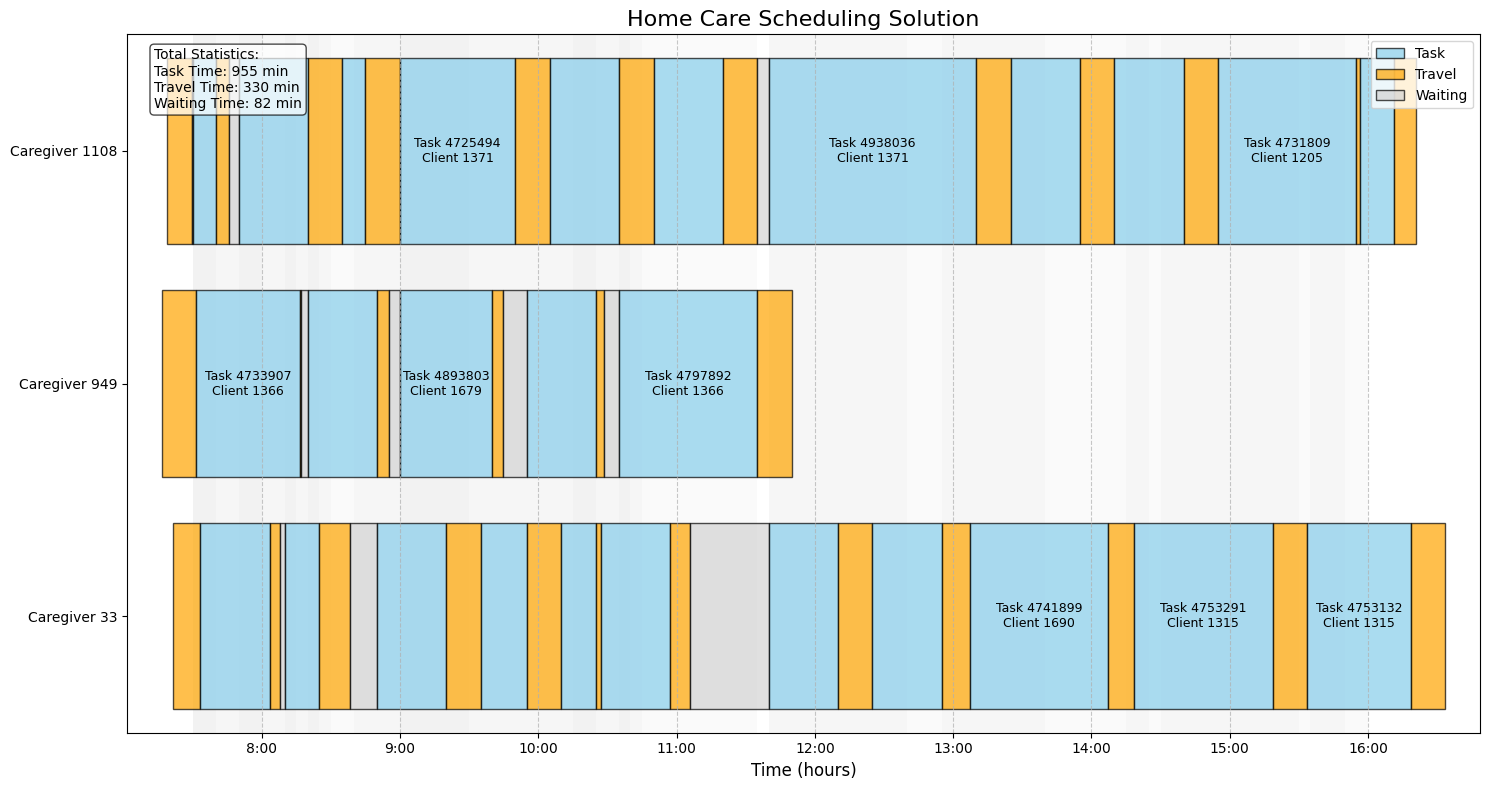

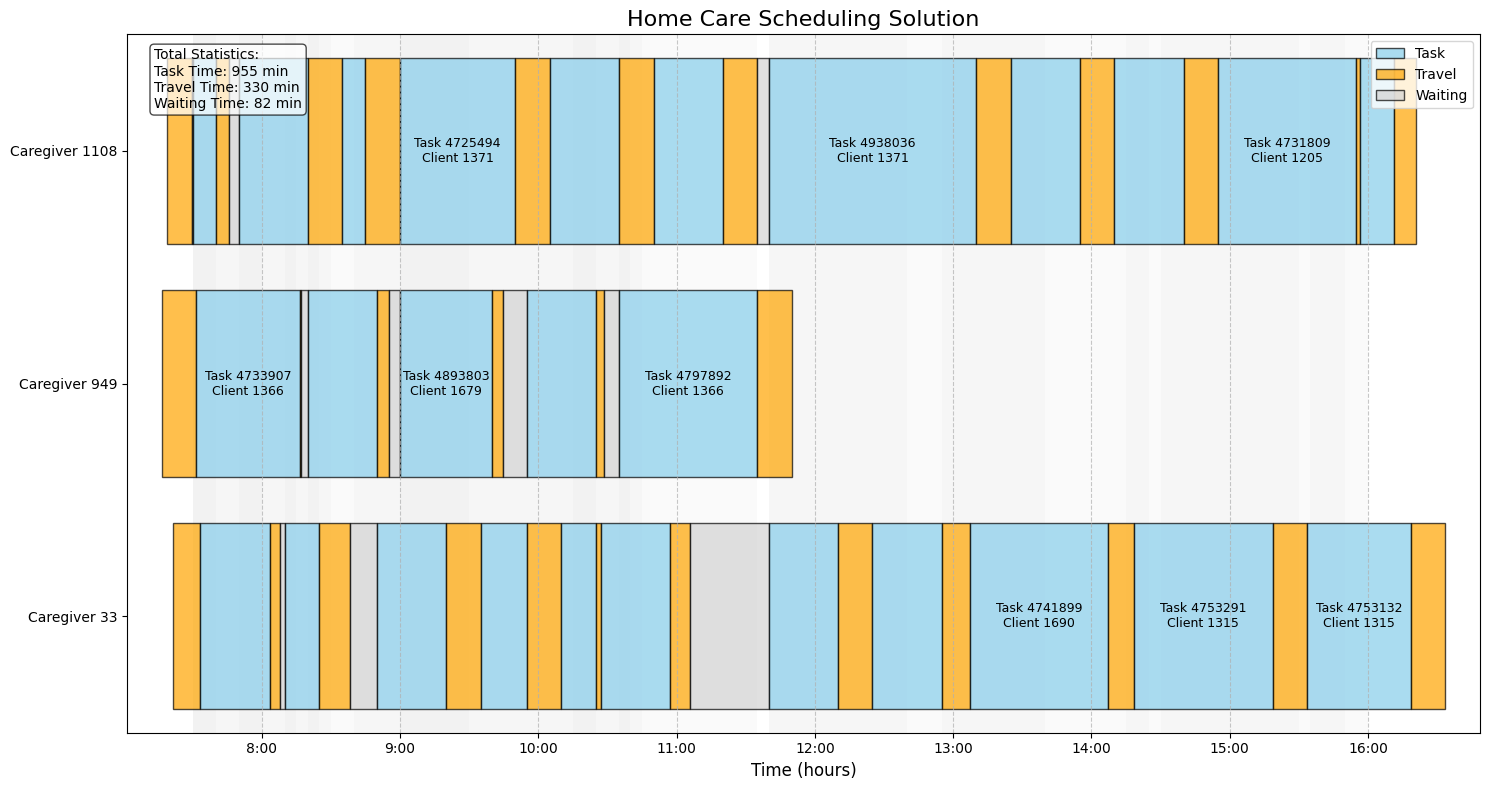

In [83]:
visualize_home_care_schedule(model_subset, x_subset, t_subset, caregivers_subset, tasks_subset, drive_time_matrix_subset)